In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('hatespeech.csv')

In [3]:
df.head()

,text,is_Hate
0,"Elon Musk is a piece of shit, greedy capitalis...",Hate
1,The senile credit card shrill from Delaware ne...,Hate
2,He does that a lot -- makes everyone look good...,Hate
3,F*ck Lizzo,Hate
4,Epstein and trump were best buds!!! Pedophiles...,Hate


In [4]:
df.tail()

,text,is_Hate
995,My maternal abuelita taught me how to make pla...,Not Hate
996,Funnily enough I was looking online last week ...,Not Hate
997,I can't bear how nice this is.\n \n I guess it...,Not Hate
998,Going to buy a share of Tesla just to ensure i...,Not Hate
999,I only saw a couple of these throughout the mo...,Not Hate


In [5]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['IS_HATE']=label_encoder.fit_transform(df['is_Hate'])
df['IS_HATE'].unique()

array([0, 1])

In [6]:
df

,text,is_Hate,IS_HATE
0,"Elon Musk is a piece of shit, greedy capitalis...",Hate,0
1,The senile credit card shrill from Delaware ne...,Hate,0
2,He does that a lot -- makes everyone look good...,Hate,0
3,F*ck Lizzo,Hate,0
4,Epstein and trump were best buds!!! Pedophiles...,Hate,0
...,...,...,...
995,My maternal abuelita taught me how to make pla...,Not Hate,1
996,Funnily enough I was looking online last week ...,Not Hate,1
997,I can't bear how nice this is.\n \n I guess it...,Not Hate,1
998,Going to buy a share of Tesla just to ensure i...,Not Hate,1


In [7]:
df.isnull().sum()

text       0
is_Hate    0
IS_HATE    0
dtype: int64

<Axes: >

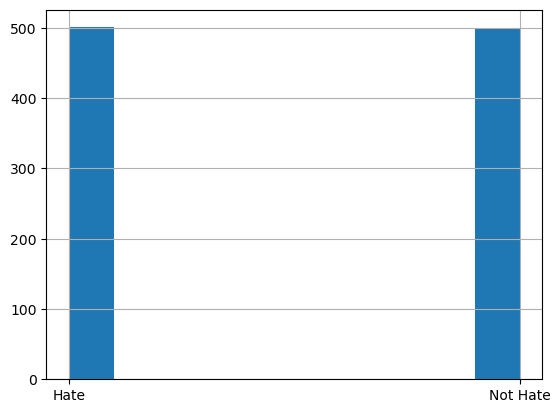

In [8]:
df['is_Hate'].hist()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['IS_HATE'],test_size=0.3,random_state=148,stratify=df['IS_HATE'])

In [11]:
x_train.shape

(700,)

In [12]:
x_test.shape

(300,)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X_train=vectorizer.fit_transform(x_train)
X_test=vectorizer.transform(x_test)

In [14]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [15]:
y_pred=mnb.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       150
           1       0.87      0.82      0.84       150

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

84.66666666666667

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmd=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))

In [19]:
import matplotlib.pyplot as plt

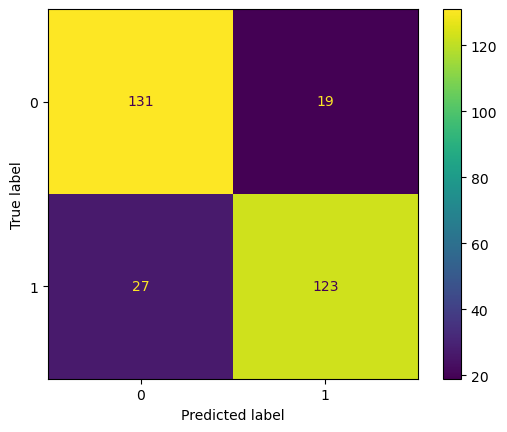

In [20]:
cmd.plot()
plt.show()

In [21]:
def test(comment):
    comment_list=[comment]
    cm=vectorizer.transform(comment_list)
    x=mnb.predict(cm)
    return label_encoder.inverse_transform(x)[0]
    

In [25]:
test('My Friend is a politician,He is an evil person')

'Not Hate'